<hr>

##### Mount Drive - **Google Colab Only Step**

When using google colab in order to access files on our google drive we need to mount the drive by running the below python cell, then clicking the link it generates and pasting the code in the cell.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Change Directory To Access The Dependent Files - **Google Colab Only Step**

In [0]:
directory = "student"
if (directory == "student"):
  %cd drive/Colab\ Notebooks/data-science-track/
else:
  %cd drive/Shared\ drives/Rubrik/Data\ Science/Course/Data-Science-Track

<hr>

<br>

# Exploratory Analysis

## In this lesson...

In this lesson, we'll go through the essential exploratory analysis steps:
1. [Understanding the data](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
5. [Correlations](#correlations)

<hr>

## Import libraries

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

In [0]:
# Data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Library Configurations: 
sns.set() # make seaborn override the styling of matplotlib graphs
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows

## Import the real estate dataset
- Use pandas' `read_csv()` function 
- Provide the following path for the data 
```python 
path = './data/real_estate_data.csv'
```

In [0]:
# Load real estate data from CSV
df = pd.read_csv('./data/real_estate_data.csv')

<br id="basic">

## Understand the data

First, always look at basic information about the dataset.

### Display the dimensions of the dataset.
- Use the `.shape` property of the DataFrame to find out the shape of the dataset

In [0]:
# Dataframe dimensions
df.shape

### Display the data types of our features
- Use the DataFrame's `info()` method to find out more about the DataFrame, such as the column data types and column names 

In [0]:
# Column datatypes
df.info()

## 

#### What columns are text, or classified as categorical data? 

- property_type
- exterior_walls
- roof

#### Display the first 5 rows to see example observations

In [0]:
# Display first 5 rows of df
df.head()

## Histograms
### Create a histogram plot using the sqft feature

In [0]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot a histogram on the figure we just created
ax.hist(df["sqft"], bins=50)

# Add the title
ax.set_title("Histogram of sqft")

# Customize the x-axis label
ax.set_xlabel("Sqft")

# Customize the y-axis label
ax.set_ylabel("Frequency")

# Call the show function to show the result
#fig.show() # We don't invoke show off of figure
plt.show()

### Create multiple histograms on one figure

Create two histograms on one figure
- figure has one row 
- figure has two columns
- plot a histogram using sqft feature
- plot a histogram using tx_price feature 

#### `plt.subplots()` parameters:
- nrows (int) number of rows the figure will have
- ncols (int) number of columns the figure will have  
- (optional) figsize: (float, float) width, height in inches

#### `ax.hist()` parameters :
- `x:` takes in an array of data as input values to plot as the first argument
- `bins:` splits the data into groups based on the number specified
- `color:` colors the histogram with one of these values {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}


In [0]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt
 
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
 
# Plot a histogram on the figure we just created
ax[0].hist(df["tx_price"], color="r")
ax[1].hist(df["sqft"])
 
# Add the title for axis 0
ax[0].set_title("Histogram of Transaction Prices feature")
 
# Customize the x-axis label for axis 0 
ax[0].set_xlabel("Price")
 
# Customize the y-axis label for axis 0
ax[0].set_ylabel("Frequency")
 
# Add the title for axis 1
ax[1].set_title("Histogram of sqft feature")
 
# Customize the x-axis label for axis 1
ax[1].set_xlabel("sqft")
 
# Customize the y-axis label for axis 
ax[1].set_ylabel("Frequency")
 
 
# Call the show function to show the result
plt.show()

<hr> 

### Using the pandas DataFrame `.hist()` method to create histogram on all features


#### Arguments to consider passing in:
- (optional) `bins:` splits the data into groups based on the number specified 
- (optional) `xrot:` rotates x-axis labels counter-clockwise; <span style="color:red"> really useful for long x index labels </span>
- (optional) `figsize`: (float, float) width, height in inches.
- (optional) `color:` colors the histogram with one of these values {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}


#### Plot the histogram grid, but make it larger, and rotate the x-axis labels clockwise by 45 degrees.
- <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">figsize=</code> argument takes a tuple for figure size, try making the figure size 20 x 20
- <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">xrot=</code> argument rotates x-axis labels **counter-clockwise**, lets move it 45% clockwise.
- The [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html) is useful for learning more about the arguments to the <code style="color:steelblue">.hist()</code> function.


In [0]:
# Plot histogram grid
df.hist(xrot=-45, figsize=(20, 20), color='g')
plt.show()


### Countplot 

One way to analyze categorical data is by creating a countplot, which will show the counts of observations in each categorical bin using bars.

We will use the `sns.countplot()` method

#### sns.countplot() parameters:
- (optional) `x` (string: series name): specify the values for the x axis
- (optional) `y` (string: series name): specify the values for the y axis
- `data` (DataFrame, array, or list of arrays): Dataset for plotting

#### Plot using a countplot using the <code style="color:steelblue">'roof'</code> feature.


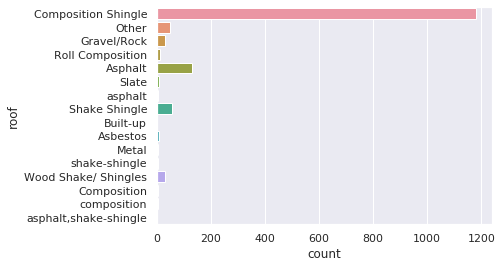

In [0]:
# count plot for 'roof'
sns.countplot(y="roof", data=df)
plt.show()

## Segmentations

Next, let's create some segmentations. Segmentations are powerful ways to cut the data to observe the relationship between **categorical features** and **numeric features**.

### Boxplots

#### Using a seaborn boxplot, plot the resulting distributions by segmenting <code style="color:steelblue">'tx_price'</code> by <code style="color:steelblue">'property_type'</code>


#### sns.boxplot() parameters:
- `y` (string): axis parameter provide the categorical column (series) name
- `x` (string): axis parameter provide the numerical column (series) name
- data (DataFrame): Dataset for plotting
<br>


In [0]:
# Segment tx_price by property_type and plot distributions
sns.boxplot( x= "tx_price", y="property_type", data=df)
plt.show()

### Groupby 
#### Using the pandas groupby method, segment by property_type and display the means and standard deviations within each class


In [0]:
df.groupby("property_type").agg([np.mean, np.std])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

### Seaborn lmplot()
#### Remember:
Seaborn's lmplot will allow you to create scatterplots, meaning comparing two numerical features for each data point. A data point being a single entry, or row, with multiple columns or otherwise refered to as features. This plot also allows you to attach additional information to each data point. This plot will allow you to see clustering of data relative to the feature values. 

#### `seaborn.lmplot()` parameters: 
- (optional) x (string: series name): specify numerical values for the x axis
- (optional) y (string: series name): specify numerical values for the y axis
- (optional) hue (string: series name): specify categorical values for the data point which helps us to group our data into clusters
- (optional) fit_reg (boolean): if `True`, estimate and plot a regression model relating the x and y variables
- (optional) height (float): height (in inches) of each facet, a particular aspect or feature of something
- (optional) aspect (float): width (in inches) of each facet, a particular aspect or feature of something
- data (DataFrame): data set for plotting 

[Seaborn lmplot Docs](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

#### Example: 
```python
sns.lmplot(data=df, x='numerical_feature_one', y='numerical_feature_two', hue='categorical_feature')
plt.show()
```

#### Create a lmplot with the following parameter values:
  - `x` = 'tx_price'
  - `y` = 'sqft'
  - `hue` = 'property_type'
  - `height` = 10 

#### Note 
- the default value for fit_reg is `True`, if you want to hide the estimate regression model lines then set the value of the `fit_reg` to False 

In [0]:
sns.lmplot(data=df, x='tx_price', y='sqft', hue='property_type', height=10, fit_reg=False)
plt.show()

## Correlations

Finally, let's take a look at the relationships between **numeric features** and **other numeric features**.

<br>

#### Create a <code style="color:steelblue">correlations</code> dataframe from <code style="color:steelblue">df</code>.

- Use pandas' DataFrame `.corr()` method to show you all of the correlations between all the columns of the DataFrame.
- Save this correlations DataFrame into a variable called `correlations`

**Note:** The default parameters utilizes the pearson correlation coefficient.


In [0]:
# Calculate correlations between numeric features
correlations = df.corr()

#### Visualize the correlation grid with a heatmap to make it easier to digest.

#### Seaborn heatmap()
A **heat map** is a graphical representation of data where the individual values contained in a matrix are represented as colors. 

#### create a seaborn.heatmap with the following parameters:
- data : correlations * 100 
- annot: True
- fmt='.0f' to format the annotations to a whole number

In [0]:
# Make the figsize 10 x 10
plt.figure(figsize=(10,10))

# Plot heatmap of annotated correlations
correlations = correlations * 100
sns.heatmap(correlations, annot=True, fmt='.0f')
plt.show()